# 결과 그림 모음 파일

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import re
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib import rc # 한글 그래픽 처리
import seaborn as sns # r에서 ggplot이라 생각하면됨. 쓸때 한글처리 주의.
%matplotlib inline 
plt.rc('font', family='Malgun Gothic') # 한글의 폰트를 맑은고딕 사용
plt.rc('axes', unicode_minus=False)
import warnings
warnings.filterwarnings("ignore")

In [11]:
data = pd.read_csv('WSDM_train_full_features.csv',engine='python')
data.head()

,target,user_idx,song_idx,ssn_idx,sst_idx,st_idx,song_length,genr_idx,art_idx,com_idx,...,lyricists_count,composer_count,is_featured,artist_count,artist_composer,artist_composer_lyricist,song_lang_boolean,smaller_song,count_song_played,count_artist_played
0,1,0,0,0,0,0,206471,7,1877,7450,...,0,2,0,0,0,0,0,1,215,1140
1,1,1,1,1,1,1,284584,18,92,2,...,0,1,0,0,0,0,0,0,1,303616
2,1,1,2,1,1,1,225396,18,527,100234,...,0,1,0,0,0,0,0,1,4,289
3,1,1,3,1,1,1,255512,229,89592,193180,...,0,1,0,0,0,0,0,0,1,1
4,1,0,4,0,0,0,187802,13,195,137,...,0,3,0,0,0,0,0,1,412,427


In [3]:
data['target'].value_counts()

1    3714656
0    3662762
Name: target, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
data,data_drop = train_test_split(data,test_size=0.15,random_state=0)
del data_drop # 삭제해서 용량 살리기 위해.

In [5]:
data['target'].value_counts()

1    1858531
0    1830178
Name: target, dtype: int64

In [6]:
target1 = data[data['target']==1]
target0 = data[data['target']==0] # 비율 구하기 위해 사용 
len(target0)

1830178

In [7]:
# target 값이 1일때 전체 데이터에 대한 비율에 맞춰 추출하기 
# 용량을 너무 많이 차지해서 한개씩 실행해야 한다. 
np.random.seed(0) # 난수고정 
target0_001 = target1.iloc[np.random.randint(0,len(target1),size=round((1/999)*len(target0))),:]
#target0_01 = target1.iloc[np.random.randint(0,len(target1),size=round((1/99)*len(target0))),:]
#target0_1 = target1.iloc[np.random.randint(0,len(target1),size=round((1/9)*len(target0)),:]

In [8]:
# 데이터 합치기 
data0_001 = pd.concat([target0,target0_001])
#data0_01 = pd.concat([target0,target0_01])
#data_0_1 = pd.concat([target1,target0_1])

In [9]:
X = data0_001.iloc[:,1:]
y = data0_001.iloc[:,0]

In [10]:
# train data, test data 분할하기. 
X_train , X_test ,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from imblearn.over_sampling import *
from imblearn.under_sampling import *
from imblearn.ensemble import *
from imblearn.combine import *

In [ ]:
# Over sampling model  
# ratio
sampling = []
sampling.append(RandomOverSampler(random_state=0))
sampling.append(SMOTE(random_state=0,k_neighbors=5,kind='borderline1'))
sampling.append(SMOTE(random_state=0,k_neighbors=5,kind='borderline2'))
sampling.append(ADASYN(random_state=0))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score,accuracy_score

In [ ]:
acu_mean = []
acu_sd = []
roc_mean = []
roc_sd = []
f1_mean = []
f1_sd = []
recall_mean = []
recall_sd = []
preci_mean = []
preci_sd = []
predict  = []
proba = []
for i in range(len(sampling)):
    model = RandomForestClassifier(random_state=0)
    if i <18:
        X_trains, y_trains = sampling[i].fit_sample(X_train, y_train)
    else :
        X_trains, y_trains = sampling[i].fit_sample(X_train, y_train)
        X_trains = X_trains[0]
        y_trains = y_trains[0]
    scores_accu = cross_val_score(model, X_trains, y_trains, cv = 5,scoring='accuracy',n_jobs = -1)
    scores_roc_auc = cross_val_score(model, X_trains, y_trains, cv = 5,scoring='roc_auc',n_jobs = -1)
    scores_f1 = cross_val_score(model, X_trains, y_trains, cv = 5,scoring='f1',n_jobs = -1)
    scores_recall = cross_val_score(model, X_trains, y_trains, cv = 5,scoring='recall',n_jobs = -1)
    scores_precision = cross_val_score(model, X_trains, y_trains, cv = 5,scoring='precision',n_jobs = -1)
    acu_mean.append(scores_accu.mean())
    acu_sd.append(scores_accu.std())
    roc_mean.append(scores_roc_auc.mean())
    roc_sd.append(scores_roc_auc.std())
    f1_mean.append(scores_f1.mean())
    f1_sd.append(scores_f1.std())
    recall_mean.append(scores_recall.mean())
    recall_sd.append(scores_recall.std())
    preci_mean.append(scores_precision.mean())
    preci_mean.append(scores_precision.std())
    model.fit(X_trains,y_trains)
    predict.append(model.predict(X_test))
    proba.append(model.predict_proba(X_test))
# pricision이 제대로 안나와서 전처리 따로 
pri_sd = []
pri = []
for i in range(5):
    pri_sd.append(preci_mean[1+2*i])
    pri.append(preci_mean[2*i])
predict_acc = []
predict_f1 = []
predict_recall = []
predict_roc = []
predict_pri = []
for i in range(len(predict)):
    predict_acc.append(accuracy_score(y_test,predict[i]))
    predict_roc.append(roc_auc_score(y_test,proba[i]))
    predict_f1.append(f1_score(y_test,predict[i]))
    predict_recall.append(recall_score(y_test,predict[i]))
    predict_pri.append(precision_score(y_test,predict[i]))    

In [57]:
cv_res = pd.DataFrame({'Scoring':['RandomOversampler','SMOTE1','SMOTE2','ADASYM','RandomUnderSampler'],
                       'AMean':acu_mean,'AStd':acu_sd,
                      'roc_auc_mean':roc_mean,'roc_auc_std':roc_sd,'f1_mean':f1_mean,
                      'f1_sd':f1_sd,'recall_mean':recall_mean,'recall_sd':recall_sd,
                      'preci_mean':pri,'preci_sd':pri_sd,'test_accu':predict_acc,
                      'test_f1':predict_f1,'test_recall':predict_recall,'test_pre':predict_pri,
                      'test_roc_auc':predict_roc})
cv_res

,Scoring,AMean,AStd,roc_auc_mean,roc_auc_std,f1_mean,f1_sd,recall_mean,recall_sd,preci_mean,preci_sd,test_accu,test_f1,test_recall,test_pre
0,RandomOversampler,0.999979,0.000004,0.999999,9.559936e-07,0.999979,0.000004,1.000000,0.000000,0.999959,0.000008,0.998970,0.000000,0.000000,0.000000
1,SMOTE1,0.999383,0.000766,0.999887,2.058870e-04,0.999382,0.000767,0.999096,0.001543,0.999669,0.000014,0.998770,0.005882,0.003656,0.015038
2,SMOTE2,0.999383,0.000766,0.999887,2.058870e-04,0.999382,0.000767,0.999096,0.001543,0.999669,0.000014,0.998770,0.005882,0.003656,0.015038
3,ADASYM,0.907288,0.006977,0.989356,2.039679e-03,0.897758,0.008526,0.814809,0.013947,0.999671,0.000025,0.998816,0.000000,0.000000,0.000000
4,RandomUnderSampler,0.589105,0.019118,0.626892,2.650636e-02,0.551816,0.019317,0.505837,0.017916,0.607215,0.023892,0.662249,0.003200,0.544790,0.001605


In [58]:
oversampling = cv_res.iloc[:4,:]
oversampling

,Scoring,AMean,AStd,roc_auc_mean,roc_auc_std,f1_mean,f1_sd,recall_mean,recall_sd,preci_mean,preci_sd,test_accu,test_f1,test_recall,test_pre
0,RandomOversampler,0.999979,0.000004,0.999999,9.559936e-07,0.999979,0.000004,1.000000,0.000000,0.999959,0.000008,0.998970,0.000000,0.000000,0.000000
1,SMOTE1,0.999383,0.000766,0.999887,2.058870e-04,0.999382,0.000767,0.999096,0.001543,0.999669,0.000014,0.998770,0.005882,0.003656,0.015038
2,SMOTE2,0.999383,0.000766,0.999887,2.058870e-04,0.999382,0.000767,0.999096,0.001543,0.999669,0.000014,0.998770,0.005882,0.003656,0.015038
3,ADASYM,0.907288,0.006977,0.989356,2.039679e-03,0.897758,0.008526,0.814809,0.013947,0.999671,0.000025,0.998816,0.000000,0.000000,0.000000


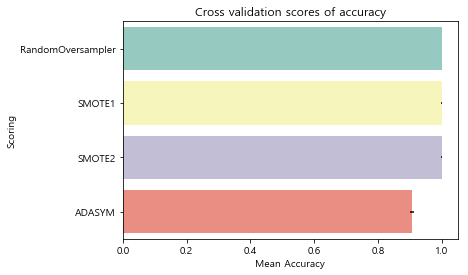

In [31]:
g = sns.barplot("AMean","Scoring",data = oversampling, palette="Set3",orient = "h",**{'xerr':acu_sd[:4]})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores of accuracy")

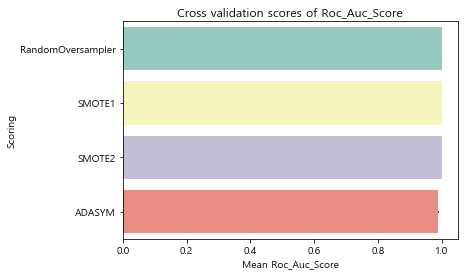

In [32]:
g = sns.barplot("roc_auc_mean","Scoring",data = oversampling, palette="Set3",orient = "h",**{'xerr':roc_sd[:4]})
g.set_xlabel("Mean Roc_Auc_Score")
g = g.set_title("Cross validation scores of Roc_Auc_Score")

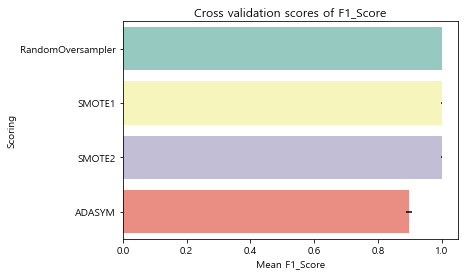

In [34]:
g = sns.barplot("f1_mean","Scoring",data = oversampling, palette="Set3",orient = "h",**{'xerr':f1_sd[:4]})
g.set_xlabel("Mean F1_Score")
g = g.set_title("Cross validation scores of F1_Score")

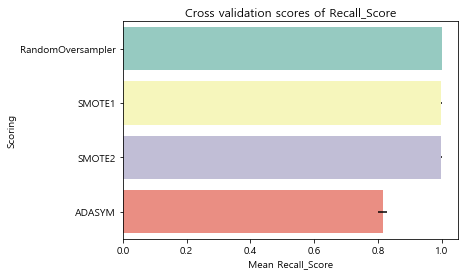

In [35]:
g = sns.barplot('recall_mean',"Scoring",data = oversampling, palette="Set3",orient = "h",**{'xerr':recall_sd[:4]})
g.set_xlabel("Mean Recall_Score")
g = g.set_title("Cross validation scores of Recall_Score")

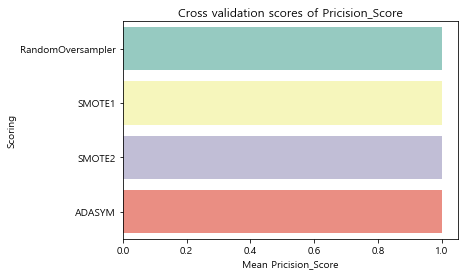

In [51]:
g = sns.barplot('preci_mean',"Scoring",data = oversampling, palette="Set3",orient = "h",**{'xerr':pri_sd[:4]})
g.set_xlabel("Mean Pricision_Score")
g = g.set_title("Cross validation scores of Pricision_Score")

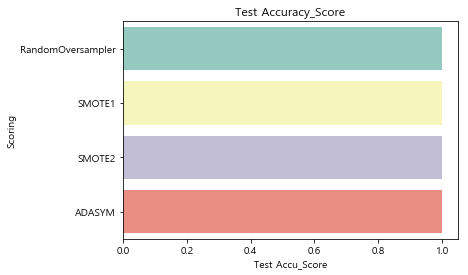

In [62]:
g = sns.barplot('test_accu',"Scoring",data = oversampling, palette="Set3",orient = "h")
g.set_xlabel("Test Accu_Score")
g = g.set_title("Test Accuracy_Score")

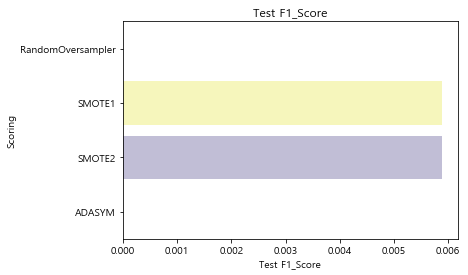

In [63]:
g = sns.barplot('test_f1',"Scoring",data = oversampling, palette="Set3",orient = "h")
g.set_xlabel("Test F1_Score")
g = g.set_title("Test F1_Score")

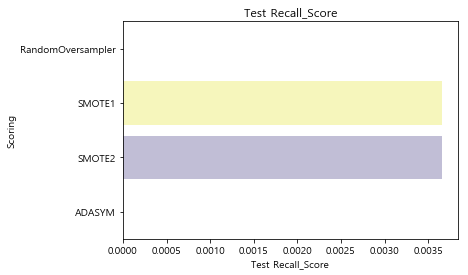

In [64]:
g = sns.barplot('test_recall',"Scoring",data = oversampling, palette="Set3",orient = "h")
g.set_xlabel("Test Recall_Score")
g = g.set_title("Test Recall_Score")

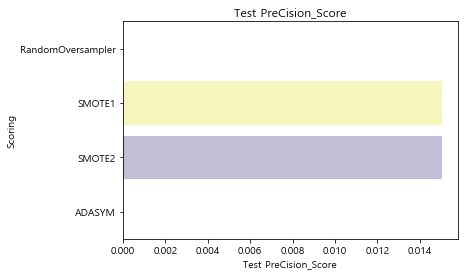

In [66]:
g = sns.barplot('test_pre',"Scoring",data = oversampling, palette="Set3",orient = "h")
g.set_xlabel("Test PreCision_Score")
g = g.set_title("Test PreCision_Score")

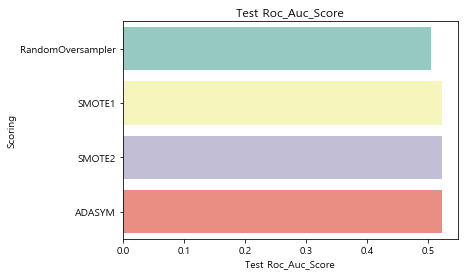

In [81]:
g = sns.barplot('test_roc_auc',"Scoring",data = oversampling, palette="Set3",orient = "h")
g.set_xlabel("Test Roc_Auc_Score")
g = g.set_title("Test Roc_Auc_Score")

In [11]:
from imblearn.over_sampling import *
from imblearn.under_sampling import *
from imblearn.ensemble import *
from imblearn.combine import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score,accuracy_score

In [12]:
sampling = []
sampling.append(RandomUnderSampler(random_state=0))
sampling.append(CondensedNearestNeighbour(random_state=0))
sampling.append(EditedNearestNeighbours(random_state=0))
sampling.append(RepeatedEditedNearestNeighbours(random_state=0))
sampling.append(AllKNN(random_state=0))
sampling.append(InstanceHardnessThreshold(random_state=0))
sampling.append(NearMiss(random_state=0,version=1))
sampling.append(NearMiss(random_state=0,version=2))
sampling.append(NearMiss(random_state=0,version=3))
sampling.append(NeighbourhoodCleaningRule(random_state=0))
sampling.append(OneSidedSelection(random_state=0))
sampling.append(TomekLinks(random_state=0))

# cobine under and over sampling
sampling.append(SMOTETomek(random_state=0, sampling_strategy='all'))
sampling.append(SMOTEENN(random_state=0))

# ensanble
sampling.append(BalanceCascade(random_state=0))
sampling.append(EasyEnsemble(random_state=0))

C:\Users\hyoun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class BalanceCascade is deprecated; BalanceCascade is deprecated in 0.4 and will be removed in 0.6.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\hyoun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class EasyEnsemble is deprecated; EasyEnsemble is deprecated in 0.4 and will be removed in 0.6. Use EasyEnsembleClassifier instead.
  warnings.warn(msg, category=DeprecationWarning)


# Under Sampling Mathod

RandomUnderSampler

In [13]:
# 결과를 표로 정리하기 위한 리스트 
roc_auc = []
accuracy = []
f1 = []
preci = []
recall = []

In [14]:
X_tra,y_tra = sampling[0].fit_sample(X_train,y_train)
model = RandomForestClassifier(random_state=0)
y_pred = model.fit(X_tra,y_tra).predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [15]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_proba))

accuracy_score 0.6634552926964007
f1_score 0.0028419310741779986
precision_score 0.0014248097247772607
recall_score 0.5266666666666666
roc_auc_score 0.6234949395521042


In [16]:
roc_auc.append(roc_auc_score(y_test,y_proba))
accuracy.append(accuracy_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))
preci.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

Condensed Nearest Neighbours

In [17]:
X_tra,y_tra = sampling[1].fit_sample(X_train,y_train)
model = RandomForestClassifier(random_state=0)
y_pred = model.fit(X_tra,y_tra).predictd(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [18]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_proba))

accuracy_score 0.9979784734742938
f1_score 0.0
precision_score 0.0
recall_score 0.0
roc_auc_score 0.5611898989530736


In [19]:
roc_auc.append(roc_auc_score(y_test,y_proba))
accuracy.append(accuracy_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))
preci.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

Edited Nearest Neighbours

In [20]:
X_tra,y_tra = sampling[2].fit_sample(X_train,y_train)
model = RandomForestClassifier(random_state=0)
y_pred = model.fit(X_tra,y_tra).predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [21]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_proba))

accuracy_score 0.9990711905152161
f1_score 0.012903225806451615
precision_score 0.2
recall_score 0.006666666666666667
roc_auc_score 0.5045353441448887


In [22]:
roc_auc.append(roc_auc_score(y_test,y_proba))
accuracy.append(accuracy_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))
preci.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

Repeated Edited Nearest Neighbours

In [23]:
X_tra,y_tra = sampling[3].fit_sample(X_train,y_train)
model = RandomForestClassifier(random_state=0)
y_pred = model.fit(X_tra,y_tra).predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [24]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_proba))

accuracy_score 0.9990711905152161
f1_score 0.012903225806451615
precision_score 0.2
recall_score 0.006666666666666667
roc_auc_score 0.5107558974421293


In [25]:
roc_auc.append(roc_auc_score(y_test,y_proba))
accuracy.append(accuracy_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))
preci.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

All KNN

In [26]:
X_tra,y_tra = sampling[4].fit_sample(X_train,y_train)
model = RandomForestClassifier(random_state=0)
y_pred = model.fit(X_tra,y_tra).predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [27]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_proba))

accuracy_score 0.9990894024658982
f1_score 0.013157894736842105
precision_score 0.5
recall_score 0.006666666666666667
roc_auc_score 0.5112270649402205


In [28]:
roc_auc.append(roc_auc_score(y_test,y_proba))
accuracy.append(accuracy_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))
preci.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

Instance Hardness Threshold

In [29]:
X_tra,y_tra = sampling[5].fit_sample(X_train,y_train)
model = RandomForestClassifier(random_state=0)
y_pred = model.fit(X_tra,y_tra).predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [30]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_proba))

accuracy_score 0.999052978564534
f1_score 0.012658227848101267
precision_score 0.125
recall_score 0.006666666666666667
roc_auc_score 0.5212792796077217


In [31]:
roc_auc.append(roc_auc_score(y_test,y_proba))
accuracy.append(accuracy_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))
preci.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

Near Miss version1

In [32]:
X_tra,y_tra = sampling[6].fit_sample(X_train,y_train)
model = RandomForestClassifier(random_state=0)
y_pred = model.fit(X_tra,y_tra).predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [33]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_proba))

accuracy_score 0.01852155384363219
f1_score 0.0017781729273171815
precision_score 0.0008899106381400867
recall_score 0.96
roc_auc_score 0.4914420605552416


In [34]:
roc_auc.append(roc_auc_score(y_test,y_proba))
accuracy.append(accuracy_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))
preci.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

Near Miss version2

In [35]:
X_tra,y_tra = sampling[7].fit_sample(X_train,y_train)
model = RandomForestClassifier(random_state=0)
y_pred = model.fit(X_tra,y_tra).predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [36]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_proba))

accuracy_score 0.026389116538272413
f1_score 0.0018670649738610906
precision_score 0.0009344047841524949
recall_score 1.0
roc_auc_score 0.5142953146551462


In [37]:
roc_auc.append(roc_auc_score(y_test,y_proba))
accuracy.append(accuracy_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))
preci.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

Near Miss version3

In [38]:
X_tra,y_tra = sampling[8].fit_sample(X_train,y_train)
model = RandomForestClassifier(random_state=0)
y_pred = model.fit(X_tra,y_tra).predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [39]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_proba))

accuracy_score 0.4943512599634547
f1_score 0.0025148495880436862
precision_score 0.001259687597475826
recall_score 0.7
roc_auc_score 0.6211257344586424


In [40]:
roc_auc.append(roc_auc_score(y_test,y_proba))
accuracy.append(accuracy_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))
preci.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

Neighbourhood Cleaning Rule

In [41]:
X_tra,y_tra = sampling[9].fit_sample(X_train,y_train)
model = RandomForestClassifier(random_state=0)
y_pred = model.fit(X_tra,y_tra).predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [42]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_proba))

accuracy_score 0.999052978564534
f1_score 0.0
precision_score 0.0
recall_score 0.0
roc_auc_score 0.5044025187804695


In [43]:
roc_auc.append(roc_auc_score(y_test,y_proba))
accuracy.append(accuracy_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))
preci.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

One Sided Selection

In [44]:
X_tra,y_tra = sampling[10].fit_sample(X_train,y_train)
model = RandomForestClassifier(random_state=0)
y_pred = model.fit(X_tra,y_tra).predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [45]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_proba))

accuracy_score 0.9990651198649887
f1_score 0.012820512820512822
precision_score 0.16666666666666666
recall_score 0.006666666666666667
roc_auc_score 0.5080547504612836


In [46]:
roc_auc.append(roc_auc_score(y_test,y_proba))
accuracy.append(accuracy_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))
preci.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

Tomek Links

In [47]:
X_tra,y_tra = sampling[11].fit_sample(X_train,y_train)
model = RandomForestClassifier(random_state=0)
y_pred = model.fit(X_tra,y_tra).predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [48]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_proba))

accuracy_score 0.9990833318156708
f1_score 0.013071895424836602
precision_score 0.3333333333333333
recall_score 0.006666666666666667
roc_auc_score 0.5112900344519589


In [49]:
roc_auc.append(roc_auc_score(y_test,y_proba))
accuracy.append(accuracy_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))
preci.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

# Combine under and over sampling

SMOTE Tomek

In [50]:
X_tra,y_tra = sampling[12].fit_sample(X_train,y_train)
model = RandomForestClassifier(random_state=0)
y_pred = model.fit(X_tra,y_tra).predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [51]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_proba))

accuracy_score 0.9988830003581683
f1_score 0.021276595744680854
precision_score 0.05263157894736842
recall_score 0.013333333333333334
roc_auc_score 0.5172393266778873


In [52]:
roc_auc.append(roc_auc_score(y_test,y_proba))
accuracy.append(accuracy_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))
preci.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

SMOTE ENN

In [53]:
X_tra,y_tra = sampling[13].fit_sample(X_train,y_train)
model = RandomForestClassifier(random_state=0)
y_pred = model.fit(X_tra,y_tra).predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [54]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_proba))

accuracy_score 0.9988465764568043
f1_score 0.010416666666666666
precision_score 0.023809523809523808
recall_score 0.006666666666666667
roc_auc_score 0.5203125993709125


In [55]:
roc_auc.append(roc_auc_score(y_test,y_proba))
accuracy.append(accuracy_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))
preci.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

# Ensanble

BalanceCascade

In [56]:
X_tra,y_tra = sampling[14].fit_sample(X_train,y_train)
X_tra = X_tra.reshape(-1,29)
y_tra = y_tra.reshape(-1,1)
model = RandomForestClassifier(random_state=0)
y_pred = model.fit(X_tra[0],y_tra[0]).predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [57]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_proba))

accuracy_score 0.6634552926964007
f1_score 0.0028419310741779986
precision_score 0.0014248097247772607
recall_score 0.5266666666666666
roc_auc_score 0.6234949395521042


In [58]:
roc_auc.append(roc_auc_score(y_test,y_proba))
accuracy.append(accuracy_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))
preci.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

Easy Ensemble

In [60]:
X_tra,y_tra = sampling[15].fit_sample(X_train,y_train)
X_tra = X_tra.reshape(-1,29)
y_tra = y_tra.reshape(-1,1)
model = RandomForestClassifier(random_state=0)
y_pred = model.fit(X_tra,y_tra).predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [61]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_proba))

accuracy_score 0.9871059389171174
f1_score 0.004686035613870665
precision_score 0.0025201612903225806
recall_score 0.03333333333333333
roc_auc_score 0.598230169869828


In [62]:
roc_auc.append(roc_auc_score(y_test,y_proba))
accuracy.append(accuracy_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))
preci.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))

In [63]:
df = pd.DataFrame({'modelname':['RUS','CNN','ENN','RNN','AKNN','IHT','NMV1','NMV2',
                               'NMV3','NCR','OSS','TL','SMOT','SMOTNN','BC','EE'],
                  'roc_auc':roc_auc,'accuracy':accuracy,'f1_score':f1,'precision':preci,
                  'recall_score':recall})
df

,modelname,roc_auc,accuracy,f1_score,precision,recall_score
0,RUS,0.623495,0.663455,0.002842,0.001425,0.526667
1,CNN,0.561190,0.997978,0.000000,0.000000,0.000000
2,ENN,0.504535,0.999071,0.012903,0.200000,0.006667
3,RNN,0.510756,0.999071,0.012903,0.200000,0.006667
4,AKNN,0.511227,0.999089,0.013158,0.500000,0.006667
5,IHT,0.521279,0.999053,0.012658,0.125000,0.006667
6,NMV1,0.491442,0.018522,0.001778,0.000890,0.960000
7,NMV2,0.514295,0.026389,0.001867,0.000934,1.000000
8,NMV3,0.621126,0.494351,0.002515,0.001260,0.700000
9,NCR,0.504403,0.999053,0.000000,0.000000,0.000000


# 그림그리기.

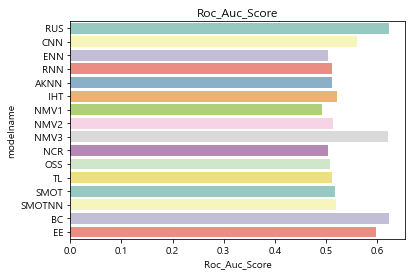

In [64]:
g = sns.barplot("roc_auc","modelname",data = df, palette="Set3",orient = "h")
g.set_xlabel("Roc_Auc_Score")
g = g.set_title("Roc_Auc_Score")

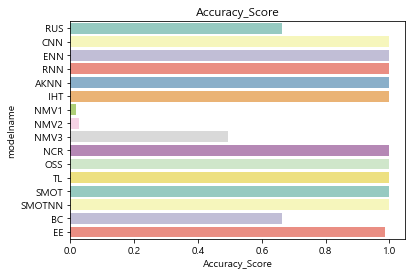

In [65]:
g = sns.barplot("accuracy","modelname",data = df, palette="Set3",orient = "h")
g.set_xlabel("Accuracy_Score")
g = g.set_title("Accuracy_Score")

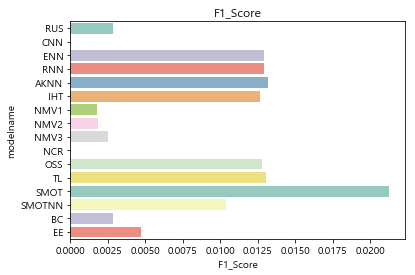

In [66]:
g = sns.barplot("f1_score","modelname",data = df, palette="Set3",orient = "h")
g.set_xlabel("F1_Score")
g = g.set_title("F1_Score")

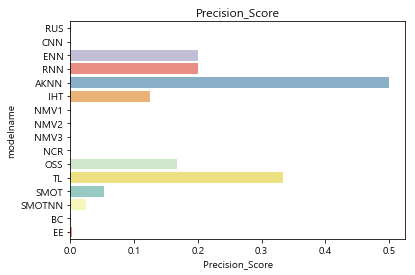

In [67]:
g = sns.barplot("precision","modelname",data = df, palette="Set3",orient = "h")
g.set_xlabel("Precision_Score")
g = g.set_title("Precision_Score")

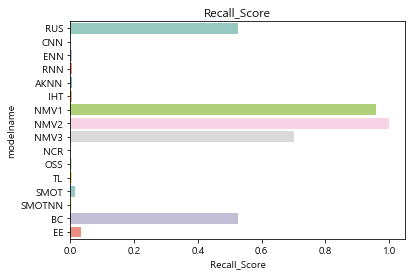

In [68]:
g = sns.barplot("recall_score","modelname",data = df, palette="Set3",orient = "h")
g.set_xlabel("Recall_Score")
g = g.set_title("Recall_Score")

# 최고의 sampling model 선택

밑에서 4개 전까지는 UnderSampling
밑에서 2개 전까지는 combine
나머지 ensanble

In [104]:
sampling = []
# OverSampling Method
sampling.append(SMOTE(random_state=0,k_neighbors=5,kind='borderline-1'))
sampling.append(SMOTE(random_state=0,k_neighbors=5,kind='borderline-2'))
sampling.append(AllKNN(random_state=0))
sampling.append(NearMiss(random_state=0,version=1))
sampling.append(TomekLinks(random_state=0))
sampling.append(SMOTETomek(random_state=0))
sampling.append(BalanceCascade(random_state=0))
sampling.append(EasyEnsemble(random_state=0))

C:\Users\hyoun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class BalanceCascade is deprecated; BalanceCascade is deprecated in 0.4 and will be removed in 0.6.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\hyoun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class EasyEnsemble is deprecated; EasyEnsemble is deprecated in 0.4 and will be removed in 0.6. Use EasyEnsembleClassifier instead.
  warnings.warn(msg, category=DeprecationWarning)


# 다른 imblanced에  최적의 모델 적용

In [105]:
target1 = data[data['target']==1]
target0 = data[data['target']==0] # 비율 구하기 위해 사용 
len(target0)

548538

In [106]:
# target 값이 1일때 전체 데이터에 대한 비율에 맞춰 추출하기 
# 용량을 너무 많이 차지해서 한개씩 실행해야 한다. 
np.random.seed(0) # 난수고정 
#target0_001 = target1.iloc[np.random.randint(0,len(target1),size=round((1/999)*len(target0))),:]
target0_01 = target1.iloc[np.random.randint(0,len(target1),size=round((1/99)*len(target0))),:]
#target0_1 = target1.iloc[np.random.randint(0,len(target1),size=round((1/9)*len(target0)),:]

In [107]:
# 데이터 합치기 
#data0_001 = pd.concat([target0,target0_001])
data0_01 = pd.concat([target0,target0_01])
#data_0_1 = pd.concat([target1,target0_1])
del target0, target0_01

In [108]:
X = data0_01.iloc[:,1:]
y = data0_01.iloc[:,0]
del data0_01

In [109]:
# train data, test data 분할하기. 
X_train , X_test ,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
roc_auc_1 = []
accuracy_1 = []
f1_1 = []
preci_1 = []
recall_1 = []

In [110]:
for i in range(len(sampling)):
    model = RandomForestClassifier(random_state=0)
    X_tra,y_tra = sampling[i].fit_sample(X_train,y_train)
    X_tra = X_tra.reshape(-1,29)
    y_tra = y_tra.reshape(-1,1)
    y_pred = model.fit(X_tra,y_tra).predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    roc_auc_1.append(roc_auc_score(y_test,y_proba))
    accuracy_1.append(accuracy_score(y_test,y_pred))
    f1_1.append(f1_score(y_test,y_pred))
    preci_1.append(precision_score(y_test,y_pred))
    recall_1.append(recall_score(y_test,y_pred))

In [117]:
df_1 = pd.DataFrame({'modelname':['SMOTE1','SMOTE2','AKNN','NM1','TL','SMOT','BC','EE' ],
                  'roc_auc':roc_auc_1,'accuracy':accuracy_1,'f1_score':f1_1,'precision':preci_1,
                  'recall_score':recall_1})
df_1

,modelname,roc_auc,accuracy,f1_score,precision,recall_score
0,SMOTE1,0.568655,0.984563,0.022848,0.030060,0.018428
1,SMOTE2,0.568655,0.984563,0.022848,0.030060,0.018428
2,AKNN,0.528562,0.990092,0.013182,0.268293,0.006757
3,NM1,0.445626,0.072703,0.018392,0.009292,0.886978
4,TL,0.530440,0.990068,0.009598,0.205128,0.004914
5,SMOT,0.581430,0.983955,0.026997,0.033243,0.022727
6,BC,0.530446,0.989977,0.014201,0.193548,0.007371
7,EE,0.605504,0.977296,0.031314,0.026896,0.037469


# 결과 그리기

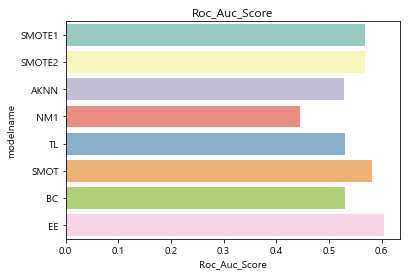

In [118]:
g = sns.barplot("roc_auc","modelname",data = df_1, palette="Set3",orient = "h")
g.set_xlabel("Roc_Auc_Score")
g = g.set_title("Roc_Auc_Score")

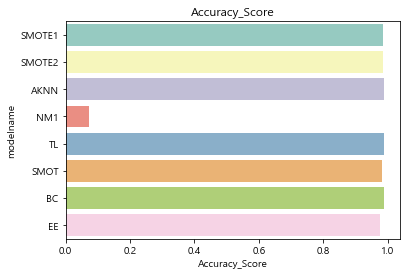

In [119]:
g = sns.barplot("accuracy","modelname",data = df_1, palette="Set3",orient = "h")
g.set_xlabel("Accuracy_Score")
g = g.set_title("Accuracy_Score")

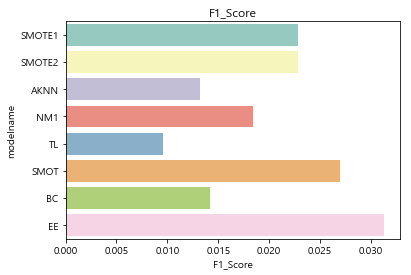

In [120]:
g = sns.barplot("f1_score","modelname",data = df_1, palette="Set3",orient = "h")
g.set_xlabel("F1_Score")
g = g.set_title("F1_Score")

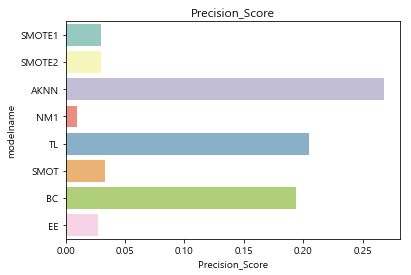

In [121]:
g = sns.barplot("precision","modelname",data = df_1, palette="Set3",orient = "h")
g.set_xlabel("Precision_Score")
g = g.set_title("Precision_Score")

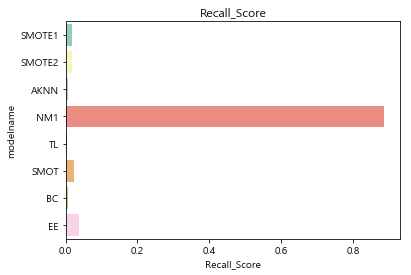

In [122]:
g = sns.barplot("recall_score","modelname",data = df_1, palette="Set3",orient = "h")
g.set_xlabel("Recall_Score")
g = g.set_title("Recall_Score")

# 10% Imbalance 데이터 

In [14]:
target1 = data[data['target']==1]
target0 = data[data['target']==0] # 비율 구하기 위해 사용 
len(target0)

548538

In [15]:
# target 값이 1일때 전체 데이터에 대한 비율에 맞춰 추출하기 
# 용량을 너무 많이 차지해서 한개씩 실행해야 한다. 
np.random.seed(0) # 난수고정 
#target0_001 = target1.iloc[np.random.randint(0,len(target1),size=round((1/999)*len(target0))),:]
#target0_01 = target1.iloc[np.random.randint(0,len(target1),size=round((1/99)*len(target0))),:]
target0_1 = target1.iloc[np.random.randint(0,len(target1),size=round((1/9)*len(target0))),:]

In [16]:
# 데이터 합치기 
#data0_001 = pd.concat([target0,target0_001])
#data0_01 = pd.concat([target0,target0_01])
data0_10 = pd.concat([target0,target0_1])
del target0, target0_1

In [17]:
X = data0_10.iloc[:,1:]
y = data0_10.iloc[:,0]
del data0_10

In [18]:
len(X)

609487

In [19]:
y.value_counts()

0    548538
1     60949
Name: target, dtype: int64

In [20]:
# train data, test data 분할하기. 
X_train , X_test ,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
roc_auc_10 = []
accuracy_10 = []
f1_10 = []
preci_10 = []
recall_10 = []

In [21]:
sampling = []
# OverSampling Method
sampling.append(SMOTE(random_state=0,k_neighbors=5,kind='borderline-1'))
sampling.append(SMOTE(random_state=0,k_neighbors=5,kind='borderline-2'))
sampling.append(AllKNN(random_state=0))
sampling.append(NearMiss(random_state=0,version=1))
sampling.append(TomekLinks(random_state=0))
sampling.append(SMOTETomek(random_state=0))
sampling.append(BalanceCascade(random_state=0))
sampling.append(EasyEnsemble(random_state=0))

C:\Users\hyoun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class BalanceCascade is deprecated; BalanceCascade is deprecated in 0.4 and will be removed in 0.6.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\hyoun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class EasyEnsemble is deprecated; EasyEnsemble is deprecated in 0.4 and will be removed in 0.6. Use EasyEnsembleClassifier instead.
  warnings.warn(msg, category=DeprecationWarning)


In [22]:
for i in range(len(sampling)):
    model = RandomForestClassifier(random_state=0)
    X_tra,y_tra = sampling[i].fit_sample(X_train,y_train)
    X_tra = X_tra.reshape(-1,29)
    y_tra = y_tra.reshape(-1,1)
    y_pred = model.fit(X_tra,y_tra).predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    roc_auc_10.append(roc_auc_score(y_test,y_proba))
    accuracy_10.append(accuracy_score(y_test,y_pred))
    f1_10.append(f1_score(y_test,y_pred))
    preci_10.append(precision_score(y_test,y_pred))
    recall_10.append(recall_score(y_test,y_pred))

In [23]:
df_10 = pd.DataFrame({'modelname':['SMOTE1','SMOTE2','AKNN','NM1','TL','SMOT','BC','EE' ],
                  'roc_auc':roc_auc_10,'accuracy':accuracy_10,'f1_score':f1_10,'precision':preci_10,
                  'recall_score':recall_10})
df_10

,modelname,roc_auc,accuracy,f1_score,precision,recall_score
0,SMOTE1,0.662649,0.870280,0.227822,0.282976,0.190660
1,SMOTE2,0.662649,0.870280,0.227822,0.282976,0.190660
2,AKNN,0.659781,0.881043,0.208277,0.313672,0.155896
3,NM1,0.447809,0.256329,0.164467,0.092685,0.729239
4,TL,0.646405,0.898587,0.147017,0.471804,0.087075
5,SMOT,0.661304,0.866506,0.224890,0.269503,0.192949
6,BC,0.648805,0.899140,0.168230,0.488220,0.101624
7,EE,0.653333,0.888213,0.201438,0.355881,0.140475


# 결과 그리기

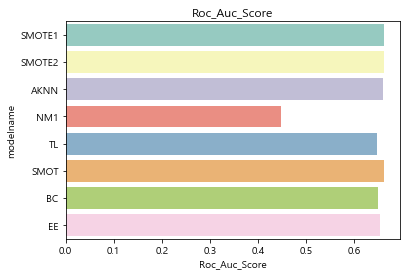

In [24]:
g = sns.barplot("roc_auc","modelname",data = df_10, palette="Set3",orient = "h")
g.set_xlabel("Roc_Auc_Score")
g = g.set_title("Roc_Auc_Score")

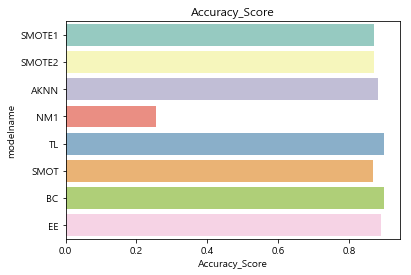

In [25]:
g = sns.barplot("accuracy","modelname",data = df_10, palette="Set3",orient = "h")
g.set_xlabel("Accuracy_Score")
g = g.set_title("Accuracy_Score")

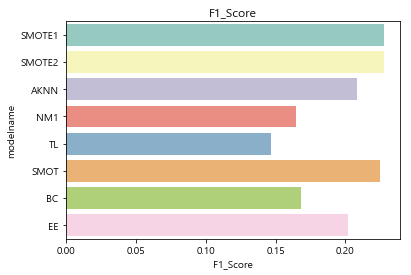

In [26]:
g = sns.barplot("f1_score","modelname",data = df_10, palette="Set3",orient = "h")
g.set_xlabel("F1_Score")
g = g.set_title("F1_Score")

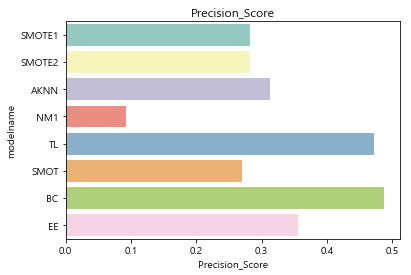

In [27]:
g = sns.barplot("precision","modelname",data = df_10, palette="Set3",orient = "h")
g.set_xlabel("Precision_Score")
g = g.set_title("Precision_Score")

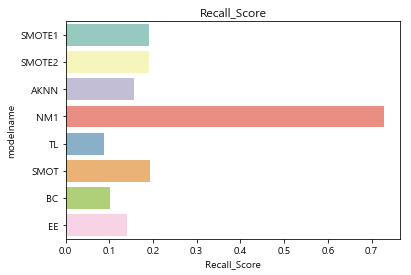

In [28]:
g = sns.barplot("recall_score","modelname",data = df_10, palette="Set3",orient = "h")
g.set_xlabel("Recall_Score")
g = g.set_title("Recall_Score")

# 최고의 선정 모델 뽑기

In [ ]:
# 최적 모델 선정하기 
## 데이터를 분석하는 목적이 Recall을 줄이기 위한게 주 목적이다 -> Near Miss version1 을 이용하자.
## 데이터를 분석하는 목적이 Precision을 줄이기 위한것이 주 목적이다 -> AKNN을 이용하자. 
## 데이터를 분석할 때 F1_Score를 가지고 평가하는게 주 목적이다 -> Easy Eansanble을 이용하자. 

# 최고의 모델 ratio 바꿔가면서 진행

### 가장 성능이 잘나온 imblanced 데이터의 비율과 모델을 가지고 ratio를 변경하면서 시행

In [29]:
sampling = []
# OverSampling Method
sampling.append(SMOTE(random_state=0,k_neighbors=5,kind='borderline1'))
sampling.append(SMOTE(random_state=0,k_neighbors=5,kind='borderline2'))
sampling.append(AllKNN(random_state=0))
sampling.append(NearMiss(random_state=0,version=1))
sampling.append(TomekLinks(random_state=0))
sampling.append(SMOTETomek(random_state=0))
sampling.append(BalanceCascade(random_state=0))
sampling.append(EasyEnsemble(random_state=0))

C:\Users\hyoun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class BalanceCascade is deprecated; BalanceCascade is deprecated in 0.4 and will be removed in 0.6.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\hyoun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class EasyEnsemble is deprecated; EasyEnsemble is deprecated in 0.4 and will be removed in 0.6. Use EasyEnsembleClassifier instead.
  warnings.warn(msg, category=DeprecationWarning)


# 20% Imbalance 데이터 

In [30]:
target1 = data[data['target']==1]
target0 = data[data['target']==0] # 비율 구하기 위해 사용 
len(target0)

548538

In [31]:
# target 값이 1일때 전체 데이터에 대한 비율에 맞춰 추출하기 
# 용량을 너무 많이 차지해서 한개씩 실행해야 한다. 
np.random.seed(0) # 난수고정 
#target0_001 = target1.iloc[np.random.randint(0,len(target1),size=round((1/999)*len(target0))),:]
#target0_01 = target1.iloc[np.random.randint(0,len(target1),size=round((1/99)*len(target0))),:]
target0_1 = target1.iloc[np.random.randint(0,len(target1),size=round((1/4)*len(target0))),:]

In [32]:
# 데이터 합치기 
#data0_001 = pd.concat([target0,target0_001])
#data0_01 = pd.concat([target0,target0_01])
data0_10 = pd.concat([target0,target0_1])
del target0, target0_1

In [33]:
X = data0_10.iloc[:,1:]
y = data0_10.iloc[:,0]
del data0_10

In [34]:
len(X)

685672

In [35]:
y.value_counts()

0    548538
1    137134
Name: target, dtype: int64

In [36]:
# train data, test data 분할하기. 
X_train , X_test ,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
roc_auc_20 = []
accuracy_20 = []
f1_20 = []
preci_20 = []
recall_20 = []

In [37]:
for i in range(len(sampling)):
    model = RandomForestClassifier(random_state=0)
    X_tra,y_tra = sampling[i].fit_sample(X_train,y_train)
    X_tra = X_tra.reshape(-1,29)
    y_tra = y_tra.reshape(-1,1)
    y_pred = model.fit(X_tra,y_tra).predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    roc_auc_20.append(roc_auc_score(y_test,y_proba))
    accuracy_20.append(accuracy_score(y_test,y_pred))
    f1_20.append(f1_score(y_test,y_pred))
    preci_20.append(precision_score(y_test,y_pred))
    recall_20.append(recall_score(y_test,y_pred))

In [38]:
df_20 = pd.DataFrame({'modelname':['SMOTE1','SMOTE2','AKNN','NM1','TL','SMOT','BC','EE' ],
                  'roc_auc':roc_auc_20,'accuracy':accuracy_20,'f1_score':f1_20,'precision':preci_20,
                  'recall_score':recall_20})
df_20

,modelname,roc_auc,accuracy,f1_score,precision,recall_score
0,SMOTE1,0.708295,0.792953,0.399870,0.471724,0.347013
1,SMOTE2,0.708295,0.792953,0.399870,0.471724,0.347013
2,AKNN,0.703853,0.736391,0.423610,0.374633,0.487319
3,NM1,0.484298,0.392617,0.305843,0.197873,0.673139
4,TL,0.700552,0.811446,0.349708,0.556065,0.255056
5,SMOT,0.700610,0.786565,0.383596,0.450308,0.334100
6,BC,0.708425,0.814387,0.370626,0.568467,0.274939
7,EE,0.703368,0.814800,0.367008,0.572376,0.270097


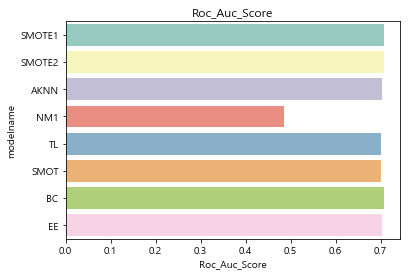

In [39]:
g = sns.barplot("roc_auc","modelname",data = df_20, palette="Set3",orient = "h")
g.set_xlabel("Roc_Auc_Score")
g = g.set_title("Roc_Auc_Score")

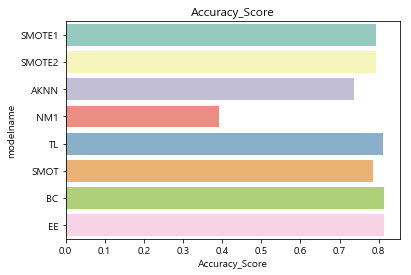

In [40]:
g = sns.barplot("accuracy","modelname",data = df_20, palette="Set3",orient = "h")
g.set_xlabel("Accuracy_Score")
g = g.set_title("Accuracy_Score")

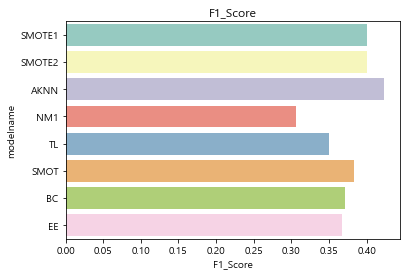

In [41]:
g = sns.barplot("f1_score","modelname",data = df_20, palette="Set3",orient = "h")
g.set_xlabel("F1_Score")
g = g.set_title("F1_Score")

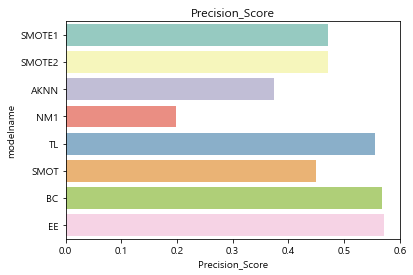

In [42]:
g = sns.barplot("precision","modelname",data = df_20, palette="Set3",orient = "h")
g.set_xlabel("Precision_Score")
g = g.set_title("Precision_Score")

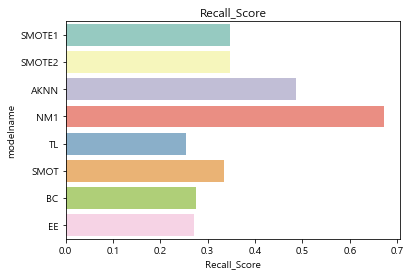

In [43]:
g = sns.barplot("recall_score","modelname",data = df_20, palette="Set3",orient = "h")
g.set_xlabel("Recall_Score")
g = g.set_title("Recall_Score")

# 30% Imbalance 데이터 

In [68]:
sampling = []
# OverSampling Method
sampling.append(SMOTE(random_state=0,k_neighbors=5,kind='borderline1'))
sampling.append(SMOTE(random_state=0,k_neighbors=5,kind='borderline2'))
sampling.append(AllKNN(random_state=0))
sampling.append(NearMiss(random_state=0,version=1))
sampling.append(TomekLinks(random_state=0))
sampling.append(SMOTETomek(random_state=0))
sampling.append(BalanceCascade(random_state=0))
sampling.append(EasyEnsemble(random_state=0))

C:\Users\hyoun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class BalanceCascade is deprecated; BalanceCascade is deprecated in 0.4 and will be removed in 0.6.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\hyoun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class EasyEnsemble is deprecated; EasyEnsemble is deprecated in 0.4 and will be removed in 0.6. Use EasyEnsembleClassifier instead.
  warnings.warn(msg, category=DeprecationWarning)


In [69]:
target1 = data[data['target']==1]
target0 = data[data['target']==0] # 비율 구하기 위해 사용 
len(target0)

548538

In [70]:
# target 값이 1일때 전체 데이터에 대한 비율에 맞춰 추출하기 
# 용량을 너무 많이 차지해서 한개씩 실행해야 한다. 
np.random.seed(0) # 난수고정 
#target0_001 = target1.iloc[np.random.randint(0,len(target1),size=round((1/999)*len(target0))),:]
#target0_01 = target1.iloc[np.random.randint(0,len(target1),size=round((1/99)*len(target0))),:]
target0_1 = target1.iloc[np.random.randint(0,len(target1),size=round((1/3)*len(target0))),:]

In [71]:
# 데이터 합치기 
#data0_001 = pd.concat([target0,target0_001])
#data0_01 = pd.concat([target0,target0_01])
data0_10 = pd.concat([target0,target0_1])
del target0, target0_1

In [72]:
X = data0_10.iloc[:,1:]
y = data0_10.iloc[:,0]
del data0_10

In [73]:
len(X)

731384

In [74]:
y.value_counts()

0    548538
1    182846
Name: target, dtype: int64

In [75]:
# train data, test data 분할하기. 
X_train , X_test ,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
roc_auc_30 = []
accuracy_30 = []
f1_30 = []
preci_30 = []
recall_30 = []

In [76]:
for i in range(len(sampling)):
    model = RandomForestClassifier(random_state=0)
    X_tra,y_tra = sampling[i].fit_sample(X_train,y_train)
    X_tra = X_tra.reshape(-1,29)
    y_tra = y_tra.reshape(-1,1)
    y_pred = model.fit(X_tra,y_tra).predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    roc_auc_30.append(roc_auc_score(y_test,y_proba))
    accuracy_30.append(accuracy_score(y_test,y_pred))
    f1_30.append(f1_score(y_test,y_pred))
    preci_30.append(precision_score(y_test,y_pred))
    recall_30.append(recall_score(y_test,y_pred))

In [77]:
df_30 = pd.DataFrame({'modelname':['SMOTE1','SMOTE2','AKNN','NM1','TL','SMOT','BC','EE' ],
                  'roc_auc':roc_auc_30,'accuracy':accuracy_30,'f1_score':f1_30,'precision':preci_30,
                  'recall_score':recall_30})
df_30

,modelname,roc_auc,accuracy,f1_score,precision,recall_score
0,SMOTE1,0.728051,0.764420,0.470270,0.537079,0.418243
1,SMOTE2,0.720368,0.762087,0.462832,0.531378,0.409949
2,AKNN,0.714264,0.672563,0.493454,0.402346,0.637901
3,NM1,0.516405,0.454671,0.379085,0.264973,0.665828
4,TL,0.720853,0.774998,0.437486,0.583402,0.349958
5,SMOT,0.721647,0.760359,0.457777,0.527033,0.404608
6,BC,0.727771,0.778877,0.455295,0.592652,0.369627
7,EE,0.724736,0.784874,0.443714,0.627626,0.343159


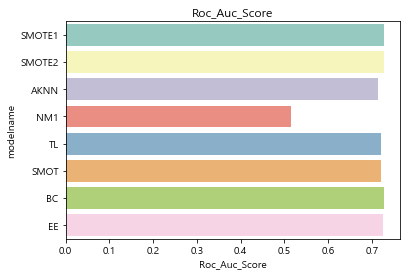

In [63]:
g = sns.barplot("roc_auc","modelname",data = df_30, palette="Set3",orient = "h")
g.set_xlabel("Roc_Auc_Score")
g = g.set_title("Roc_Auc_Score")

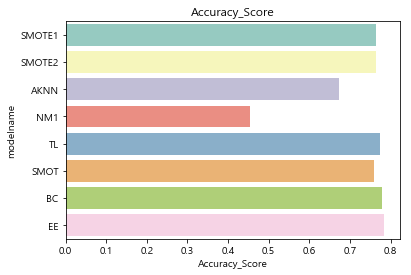

In [64]:
g = sns.barplot("accuracy","modelname",data = df_30, palette="Set3",orient = "h")
g.set_xlabel("Accuracy_Score")
g = g.set_title("Accuracy_Score")

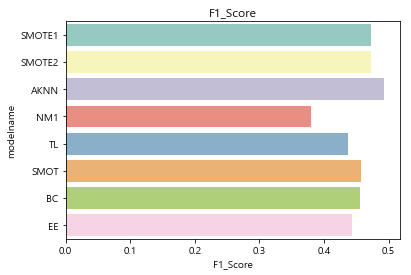

In [65]:
g = sns.barplot("f1_score","modelname",data = df_30, palette="Set3",orient = "h")
g.set_xlabel("F1_Score")
g = g.set_title("F1_Score")

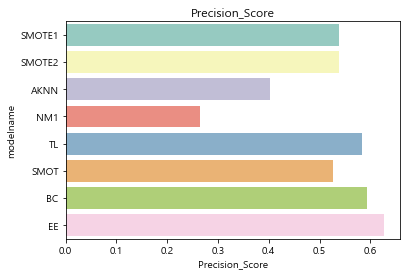

In [66]:
g = sns.barplot("precision","modelname",data = df_30, palette="Set3",orient = "h")
g.set_xlabel("Precision_Score")
g = g.set_title("Precision_Score")

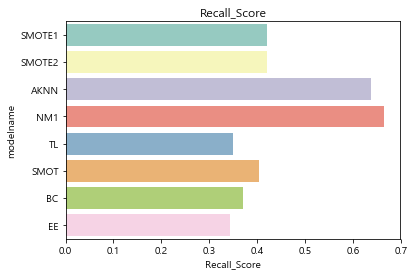

In [67]:
g = sns.barplot("recall_score","modelname",data = df_30, palette="Set3",orient = "h")
g.set_xlabel("Recall_Score")
g = g.set_title("Recall_Score")